In [1]:
%pip install datasets transformers --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.1/316.1 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 6.3 MB/s eta 0:00:00


In [ ]:
import sklearn
import pandas as pd
import numpy as np
import random
import torch

seed = 42

np.random.seed(seed)
random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)

Getting the dataset.

In [ ]:
from datasets import load_dataset
sem_eval_2018_task_1 = load_dataset('sem_eval_2018_task_1', 'subtask5.english', trust_remote_code=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/6838 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/3259 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/886 [00:00<?, ? examples/s]

Calculating and visualizing the distribution of labels.

<Figure size 1400x800 with 0 Axes>

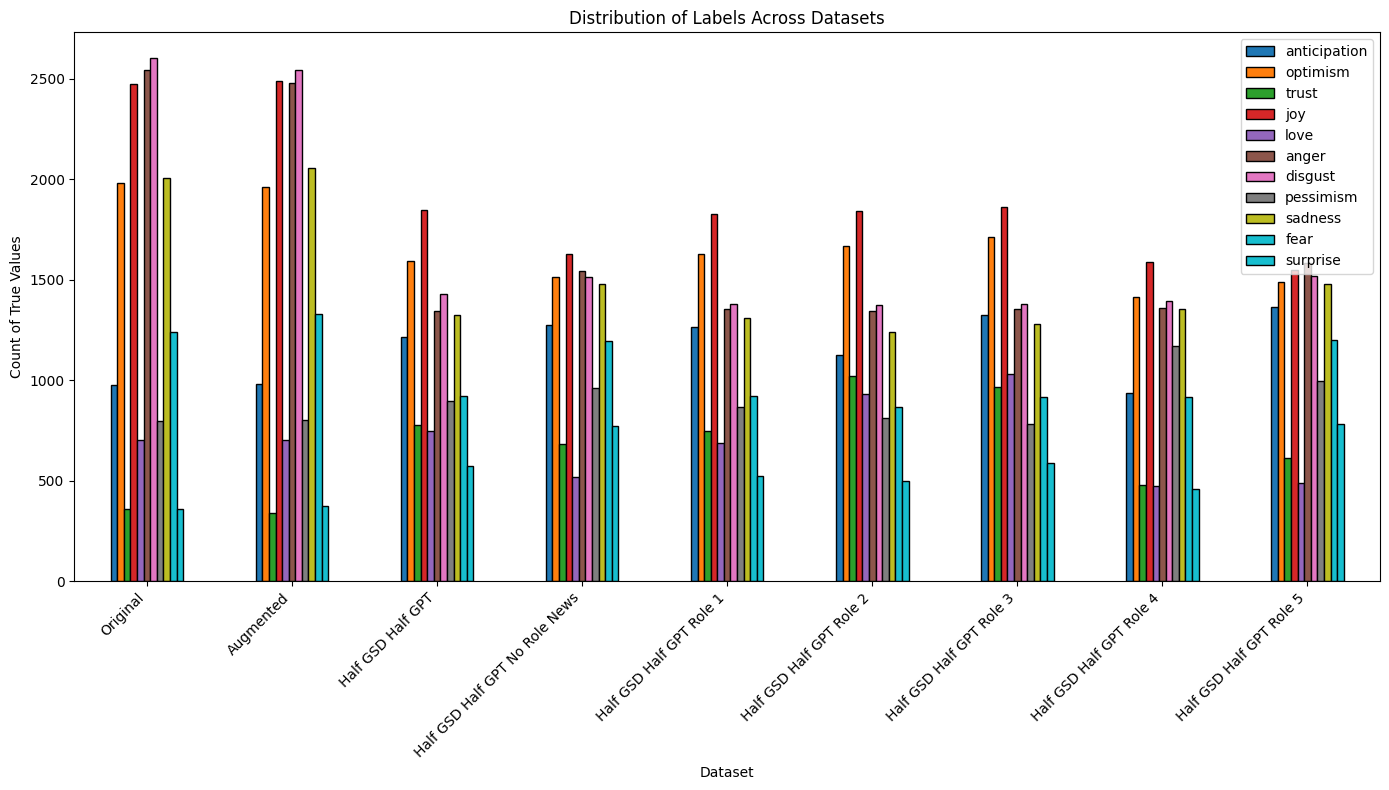

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
df = pd.DataFrame(sem_eval_2018_task_1['train'])
augmented_data = pd.read_csv('augmented_data.csv')
half_gsd_half_gpt_data = pd.read_csv('half_gsd_half_gpt_data.csv')
half_gsd_half_gpt_data_no_role_news = pd.read_csv('half_gsd_half_gpt_data_no_role_news.csv')
half_gsd_half_gpt_data_role_1 = pd.read_csv('half_gsd_half_gpt_data_role_1.csv')
half_gsd_half_gpt_data_role_2 = pd.read_csv('half_gsd_half_gpt_data_role_2.csv')
half_gsd_half_gpt_data_role_3 = pd.read_csv('half_gsd_half_gpt_data_role_3.csv')
half_gsd_half_gpt_data_role_4 = pd.read_csv('half_gsd_half_gpt_data_role_4.csv')
half_gsd_half_gpt_data_role_5 = pd.read_csv('half_gsd_half_gpt_data_role_5.csv')

# Define label columns
label_columns = ['anticipation', 'optimism', 'trust', 'joy', 'love', 'anger', 'disgust', 'pessimism', 'sadness', 'fear', 'surprise']

# Calculate the distribution of True values for each label in each dataset
def calculate_label_distribution(df, labels):
    return df[labels].sum()

distributions = {
    'Original': calculate_label_distribution(df, label_columns),
    'Augmented': calculate_label_distribution(augmented_data, label_columns),
    'Half GSD Half GPT': calculate_label_distribution(half_gsd_half_gpt_data, label_columns),
    'Half GSD Half GPT No Role News': calculate_label_distribution(half_gsd_half_gpt_data_no_role_news, label_columns),
    'Half GSD Half GPT Role 1': calculate_label_distribution(half_gsd_half_gpt_data_role_1, label_columns),
    'Half GSD Half GPT Role 2': calculate_label_distribution(half_gsd_half_gpt_data_role_2, label_columns),
    'Half GSD Half GPT Role 3': calculate_label_distribution(half_gsd_half_gpt_data_role_3, label_columns),
    'Half GSD Half GPT Role 4': calculate_label_distribution(half_gsd_half_gpt_data_role_4, label_columns),
    'Half GSD Half GPT Role 5': calculate_label_distribution(half_gsd_half_gpt_data_role_5, label_columns)
}

# Convert distributions to DataFrame for easy plotting
distribution_df = pd.DataFrame(distributions).T

# Plot the distributions
plt.figure(figsize=(14, 8))
distribution_df.plot(kind='bar', figsize=(14, 8), colormap='tab10', edgecolor='black')
plt.title('Distribution of Labels Across Datasets')
plt.xlabel('Dataset')
plt.ylabel('Count of True Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the plot to a file
# plt.savefig('label_distribution_comparison.png')
plt.show()

<Figure size 1400x1000 with 0 Axes>

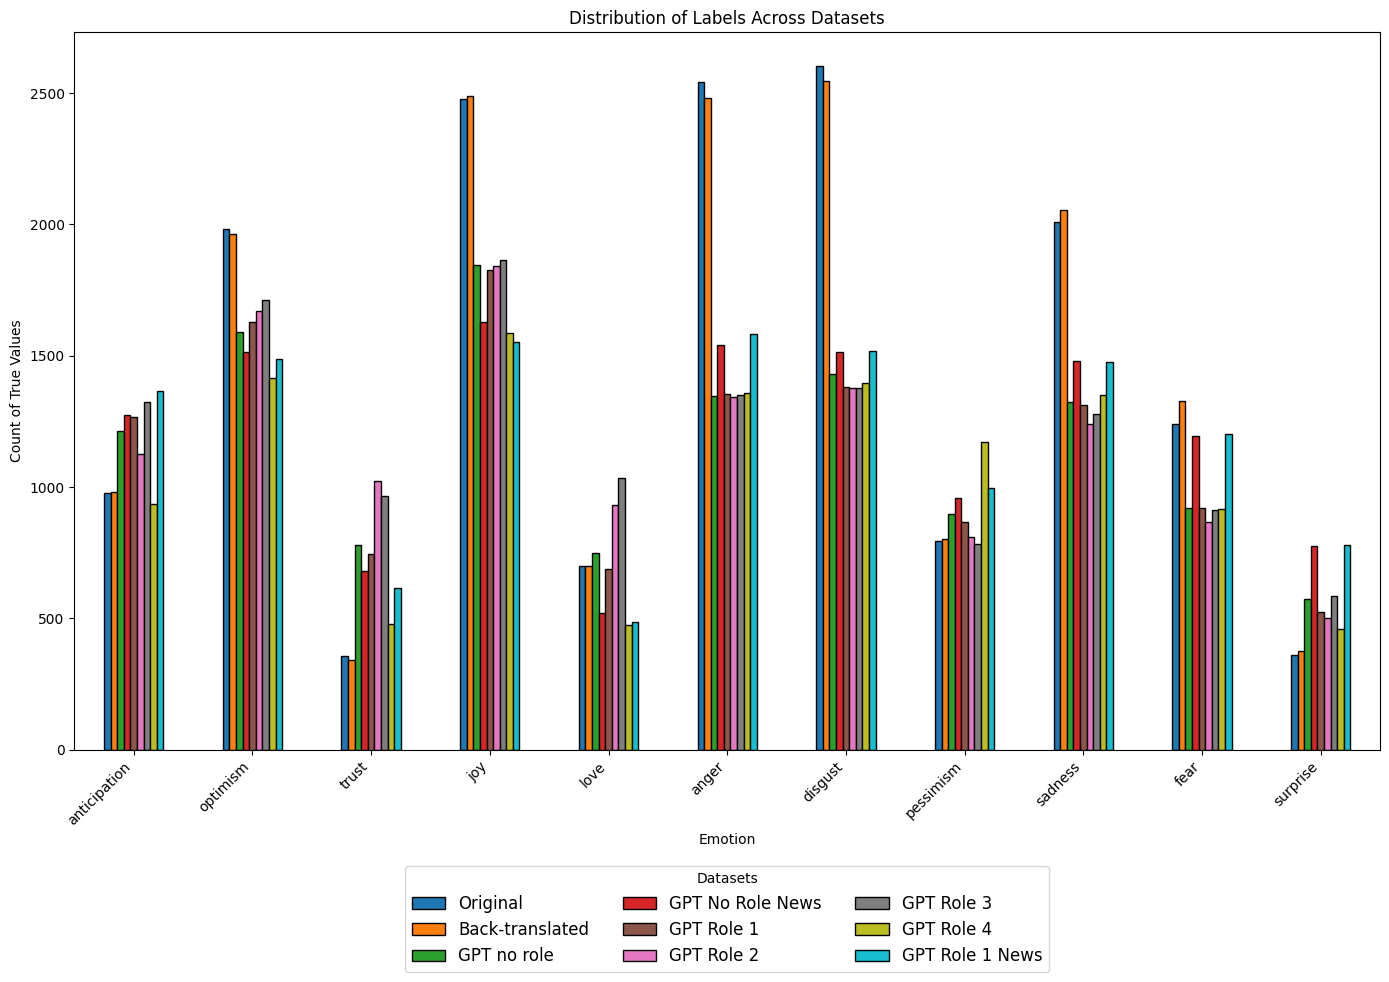

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
df = pd.DataFrame(sem_eval_2018_task_1['train'])
augmented_data = pd.read_csv('augmented_data.csv')
half_gsd_half_gpt_data = pd.read_csv('half_gsd_half_gpt_data.csv')
half_gsd_half_gpt_data_no_role_news = pd.read_csv('half_gsd_half_gpt_data_no_role_news.csv')
half_gsd_half_gpt_data_role_1 = pd.read_csv('half_gsd_half_gpt_data_role_1.csv')
half_gsd_half_gpt_data_role_2 = pd.read_csv('half_gsd_half_gpt_data_role_2.csv')
half_gsd_half_gpt_data_role_3 = pd.read_csv('half_gsd_half_gpt_data_role_3.csv')
half_gsd_half_gpt_data_role_4 = pd.read_csv('half_gsd_half_gpt_data_role_4.csv')
half_gsd_half_gpt_data_role_5 = pd.read_csv('half_gsd_half_gpt_data_role_5.csv')

# Define label columns
label_columns = ['anticipation', 'optimism', 'trust', 'joy', 'love', 'anger', 'disgust', 'pessimism', 'sadness', 'fear', 'surprise']

# Calculate the distribution of True values for each label in each dataset
def calculate_label_distribution(df, labels):
    return df[labels].sum()

# Collect distributions for each dataset
distributions = {
    'Original': calculate_label_distribution(df, label_columns),
    'Back-translated': calculate_label_distribution(augmented_data, label_columns),
    'GPT no role': calculate_label_distribution(half_gsd_half_gpt_data, label_columns),
    'GPT No Role News': calculate_label_distribution(half_gsd_half_gpt_data_no_role_news, label_columns),
    'GPT Role 1': calculate_label_distribution(half_gsd_half_gpt_data_role_1, label_columns),
    'GPT Role 2': calculate_label_distribution(half_gsd_half_gpt_data_role_2, label_columns),
    'GPT Role 3': calculate_label_distribution(half_gsd_half_gpt_data_role_3, label_columns),
    'GPT Role 4': calculate_label_distribution(half_gsd_half_gpt_data_role_4, label_columns),
    'GPT Role 1 News': calculate_label_distribution(half_gsd_half_gpt_data_role_5, label_columns)
}

# Convert distributions to DataFrame and transpose for plotting
distribution_df = pd.DataFrame(distributions)

# Plot the distributions
plt.figure(figsize=(14, 10))
distribution_df.plot(kind='bar', figsize=(14, 10), colormap='tab10', edgecolor='black')
plt.title('Distribution of Labels Across Datasets')
plt.xlabel('Emotion')
plt.ylabel('Count of True Values')
plt.xticks(rotation=45, ha='right')

# Add legend underneath the plot
plt.legend(title='Datasets', bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=3, fontsize='large')

plt.tight_layout()

# Save the plot to a file
plt.savefig('label_distribution_comparison.png')
plt.show()

Single label data

<Figure size 1400x1000 with 0 Axes>

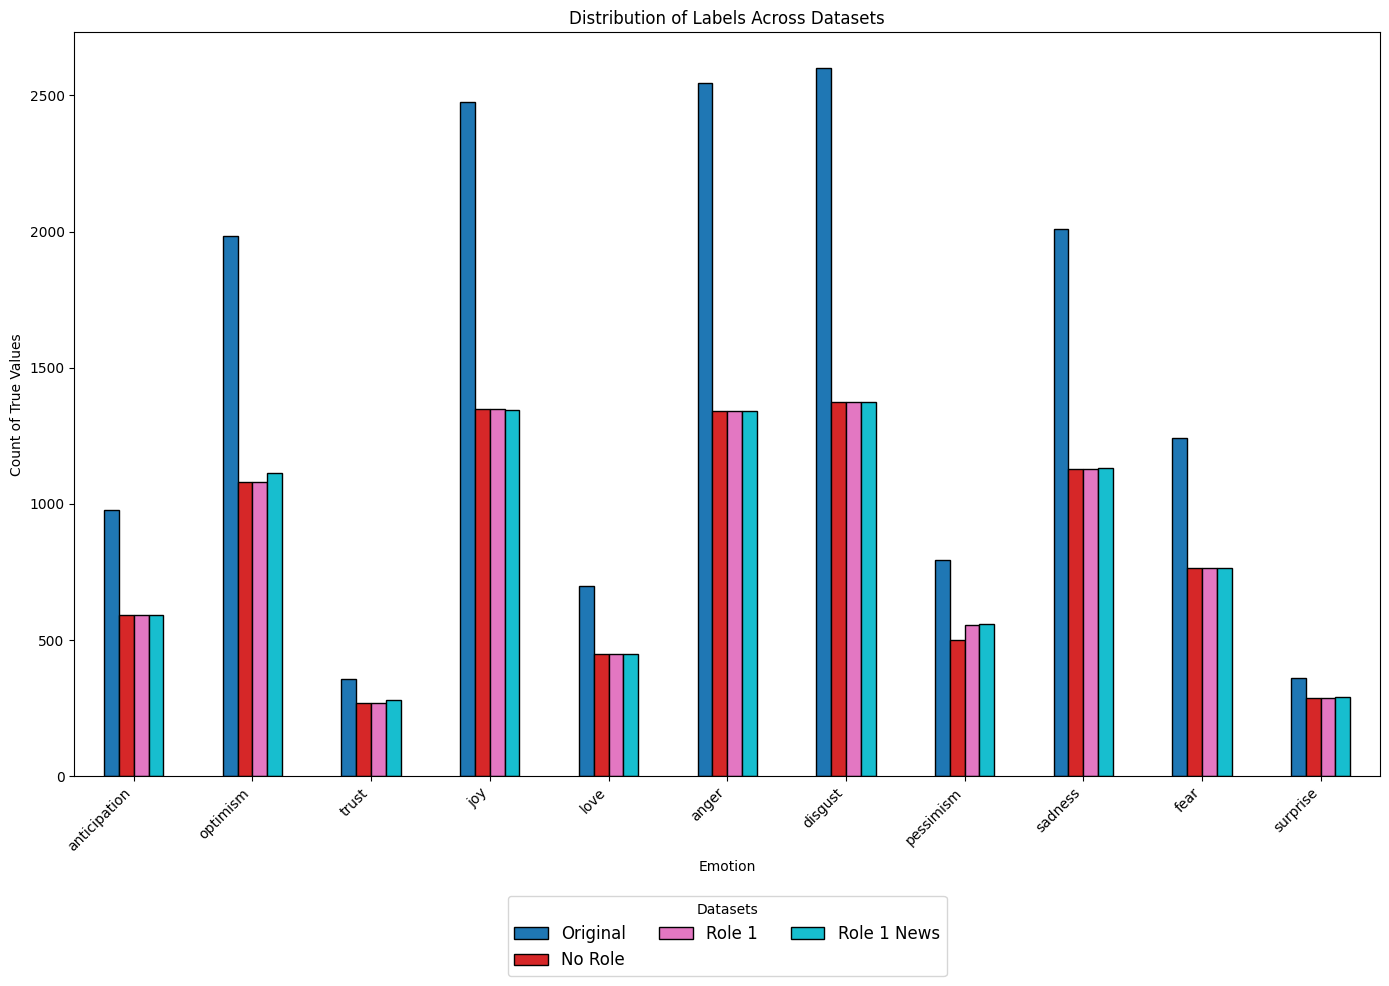

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
df = pd.DataFrame(sem_eval_2018_task_1['train'])
single_label_no_role = pd.read_csv('gsd_gpt_single_label_no_role.csv')
single_label_role_1 = pd.read_csv('gsd_gpt_single_label_role_1.csv')
single_label_role_1_news = pd.read_csv('gsd_gpt_single_label_role_1_news.csv')
# Define label columns
label_columns = ['anticipation', 'optimism', 'trust', 'joy', 'love', 'anger', 'disgust', 'pessimism', 'sadness', 'fear', 'surprise']

# Calculate the distribution of True values for each label in each dataset
def calculate_label_distribution(df, labels):
    return df[labels].sum()

# Collect distributions for each dataset
distributions = {
    'Original': calculate_label_distribution(df, label_columns),
    'No Role': calculate_label_distribution(single_label_no_role, label_columns),
    'Role 1': calculate_label_distribution(single_label_role_1, label_columns),
    'Role 1 News': calculate_label_distribution(single_label_role_1_news, label_columns)
}

# Convert distributions to DataFrame and transpose for plotting
distribution_df = pd.DataFrame(distributions)

# Plot the distributions
plt.figure(figsize=(14, 10))
distribution_df.plot(kind='bar', figsize=(14, 10), colormap='tab10', edgecolor='black')
plt.title('Distribution of Labels Across Datasets')
plt.xlabel('Emotion')
plt.ylabel('Count of True Values')
plt.xticks(rotation=45, ha='right')

# Add legend underneath the plot
plt.legend(title='Datasets', bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=3, fontsize='large')

plt.tight_layout()

# Save the plot to a file
plt.savefig('single_label_distribution_comparison.png')
plt.show()